In [2]:
import pandas as pd
import openpyxl

from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#read data from excel file
drdata_df = pd.read_excel('drdata.xlsx')
drq_df = pd.read_excel('drq.xlsx')
alldata_df = pd.read_excel('alldata.xlsx')

tv2data_df = pd.read_excel('tv2data.xlsx')
tv2q_df = pd.read_excel('tv2q.xlsx')

elected_candidate_df = pd.read_excel('electeddata.xlsx')

In [4]:
#count the number of unique values in all columns of drq_df
drq_df.nunique()

ID                          25
Title                        8
Question                    25
Info                         0
ArgumentFor                 25
ArgumentAgainst             25
WordMerger                   1
ID_CandidateQuestionType     1
Rule                         1
QuestionListData             0
dtype: int64

In [5]:
#count the number of unique values in all columns of tv2q_df
print(tv2q_df.nunique())

# #print uniqe values in all columns of tv2q_df
# for col in tv2q_df.columns:
#     print(col, tv2q_df[col].unique())

#print header and count of question in tv2q_df where count is greater than 1
q = tv2q_df['question'].value_counts()
#print rows from tv2q_df where question is in q
tv2q_df[tv2q_df['question'].isin(q.index[q.gt(1)])]

id          74
type         1
header      22
question    72
depends     10
dtype: int64


,id,type,header,question,depends
11,københavns omegns-2,rate,Københavns Omegns Storkreds,Der skal sendes færre penge fra Øst- til Vestd...,{'selectedArea': 'københavns omegns storkreds'}
12,københavns omegns-3,rate,Københavns Omegns Storkreds,Der skal være strengere miljøkrav til industri...,{'selectedArea': 'københavns omegns storkreds'}
25,nordsjællands-1,rate,Nordsjællands Storkreds,Der skal sendes færre penge fra Øst- til Vestd...,{'selectedArea': 'nordsjællands storkreds'}
28,nordsjællands-4,rate,Nordsjællands Storkreds,Der skal være strengere miljøkrav til industri...,{'selectedArea': 'nordsjællands storkreds'}


In [6]:
alldata_df.head()

,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,navn,parti,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


In [7]:
elected_candidate_df.head()

,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,navn,parti,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,2,-2,-2,-2,2,2,-2,1,1,-2,-2,2,2,2,2,Torsten Gejl,Alternativet,0,2,1,0,-2,2,2,2,-2,0,2,-2,-2,-2,0,0,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,2,-2,-2,-2,2,1,-2,1,-1,-2,-2,2,2,2,2,Mai Villadsen,Enhedslisten,1,2,2,0,-1,2,2,2,-2,0,2,-2,-2,0,0,0,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,-2,1,-2,-2,1,-2,2,-1,1,2,-2,1,-1,1,1,Hans Kristian Skibby,Danmarksdemokraterne,-2,-2,0,-2,1,-2,0,1,-2,-1,-2,2,-2,2,-1,-1,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,-1,1,-2,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,Troels Lund Poulsen,Venstre,-1,0,1,1,1,-2,0,1,1,1,-2,2,-1,2,2,1,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46


# Setting up a data frame with all the candidate data including only questions and factorized party ids

In [8]:
all_data_only_q = alldata_df
# represent each party with a number
all_data_only_q['parti_id'] = all_data_only_q['parti'].factorize()[0]

#drop non-numeric columns from alldata_df
for col in all_data_only_q.columns:
    if all_data_only_q[col].dtype == 'object' :
        all_data_only_q = all_data_only_q.drop(columns=[col])

#drop age column from all_data_only_q
all_data_only_q = all_data_only_q.drop(columns=['alder'])
all_data_only_q.head()

,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b,parti_id
0,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1,0
1,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0,1
2,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2,2
3,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0,2
4,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2,3


# Using a correlation matrix to determine which questions influence the party affiliation the most

In [9]:
#questions that influence the result the most:
#correlation matrix for parti-id and all other columns sorted ascending
corr_matrix = all_data_only_q.corr()
print(corr_matrix['parti_id'].sort_values(ascending=False))

parti_id    1.000000
555         0.416257
543         0.410105
6b          0.400160
535         0.399983
3a          0.399362
545         0.363524
537         0.353621
540         0.273887
533         0.273832
7b          0.265187
10a         0.244719
556         0.235374
551         0.224222
9a          0.222450
7a          0.197378
12a         0.172835
546         0.156788
547         0.117468
5a          0.072764
553         0.025935
11b         0.020991
534         0.015869
12b        -0.044849
5b         -0.049241
561        -0.079542
538        -0.103230
11a        -0.143759
9b         -0.156401
8a         -0.156538
4b         -0.172984
552        -0.207074
2b         -0.215820
8b         -0.222873
559        -0.226727
10b        -0.255420
1b         -0.264199
1a         -0.275958
544        -0.295743
2a         -0.314278
557        -0.320877
3b         -0.331022
548        -0.334960
550        -0.347400
4a         -0.363813
6a         -0.364659
530        -0.371468
563        -0

# Count the number of rows where age is 0 (most likely due to a mistake in input / candidate didn't want to provide their age)

In [10]:
alldata_df.loc[alldata_df['alder'] == 0, 'alder'].count()

16

## Replacing the zeroes with median age

In [11]:
#replace age 0 with median of the corresponding parti
alldata_df.loc[alldata_df['alder'] == 0, 'alder'] = alldata_df.groupby('parti')['alder'].transform('median')
alldata_df.loc[alldata_df['alder'] == 0, 'alder'].count()

0

In [12]:
#average of all columns grouped by parti_id for all candidates
allcandidate_df_without_name = alldata_df.drop(columns=['navn', 'storkreds'])
allcandidate_df_without_name.groupby('parti').mean()

,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b,alder,parti_id
parti,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alternativet,1.880597,1.134328,-1.895522,-1.820896,-0.776119,-1.641791,-0.716418,0.283582,1.149254,-1.432836,1.328358,-0.791045,-0.522388,-0.313433,1.388060,1.149254,-1.761194,0.701493,-0.462687,-1.850746,-0.910448,1.522388,1.910448,1.671642,1.701493,1.567164,1.835821,1.462687,1.298507,-0.716418,1.477612,1.746269,0.701493,-1.089552,0.492537,1.537313,-1.835821,-0.940299,-0.343284,1.268657,1.134328,-1.477612,0.164179,-0.149254,1.029851,0.164179,0.492537,0.492537,-0.671642,47.432836,2.0
Danmarksdemokraterne,-0.837838,-1.378378,1.513514,-0.972973,1.756757,0.189189,-1.864865,1.054054,-1.918919,0.972973,-1.783784,0.702703,-1.459459,-1.783784,-0.783784,-1.756757,1.756757,-0.648649,1.216216,1.837838,-1.918919,0.783784,-1.270270,-0.891892,0.729730,-1.756757,-1.702703,-0.135135,-1.108108,1.324324,-1.864865,0.108108,1.108108,-1.297297,0.918919,-1.810811,1.891892,-1.405405,1.810811,1.000000,0.729730,0.567568,-0.702703,0.918919,1.918919,-1.972973,1.891892,0.486486,0.297297,51.216216,5.0
Dansk Folkeparti,-0.571429,-1.081633,1.551020,1.653061,1.551020,0.000000,-1.551020,0.734694,-1.448980,0.510204,-1.755102,-1.571429,1.183673,-1.469388,0.122449,-1.673469,1.775510,0.204082,0.877551,1.836735,-1.510204,1.163265,-0.632653,-0.408163,0.591837,-1.510204,-0.591837,1.183673,-0.632653,1.510204,-1.816327,0.448980,1.408163,-1.489796,1.285714,-1.938776,1.530612,0.979592,1.408163,0.979592,0.489796,0.816327,-0.306122,0.918367,1.448980,-1.693878,1.795918,0.816327,-0.693878,45.530612,8.0
Det Konservative Folkeparti,-0.836735,-1.877551,0.948980,-1.714286,1.816327,1.408163,-1.979592,1.663265,-1.255102,1.397959,-1.612245,1.040816,0.520408,-1.438776,-1.224490,-1.704082,-0.816327,-0.836735,-0.224490,1.010204,1.744898,-0.040816,-0.397959,0.642857,-0.826531,-1.418367,-0.397959,0.540816,0.071429,1.653061,-1.214286,-0.948980,0.530612,-1.244898,1.102041,-1.255102,0.857143,0.479592,1.102041,1.142857,0.275510,0.500000,-0.295918,1.469388,-1.612245,-1.806122,1.806122,0.765306,-0.295918,44.795918,12.0
Enhedslisten,1.959459,1.864865,-1.918919,0.405405,-1.662162,-1.878378,0.418919,-1.797297,1.635135,-1.783784,1.567568,-1.635135,-1.432432,-1.743243,1.837838,1.418919,-1.743243,0.959459,0.054054,-1.959459,-1.864865,1.918919,1.864865,1.608108,1.675676,1.067568,1.797297,1.783784,0.500000,-1.756757,1.743243,2.000000,1.432432,-1.878378,0.364865,1.891892,-1.986486,-1.662162,-0.081081,0.824324,0.445946,-1.824324,0.283784,-1.040541,1.905405,0.702703,-1.162162,-0.554054,0.108108,42.094595,4.0
"Frie Grønne, Danmarks Nye Venstrefløjsparti",1.923077,1.923077,-2.000000,-1.692308,-1.769231,-2.000000,-1.769231,-1.461538,1.692308,-1.884615,1.346154,-0.423077,-1.653846,-1.884615,1.807692,1.807692,-2.000000,1.000000,-1.576923,-2.000000,-1.846154,1.961538,2.000000,1.807692,1.807692,1.769231,1.884615,1.961538,1.307692,-1.730769,1.807692,2.000000,1.000000,-1.615385,0.846154,1.846154,-2.000000,-1.884615,0.000000,1.230769,0.538462,-1.692308,0.461538,-0.461538,1.615385,-1.115385,1.346154,0.000000,0.269231,34.807692,7.0
Kristendemokraterne,0.880952,-0.666667,-1.285714,-1.595238,1.190476,-0.428571,-1.047619,0.976190,-0.571429,0.071429,-1.738095,-0.190476,1.809524,1.214286,0.952381,-1.666667,-1.642857,-0.404762,0.857143,-1.857143,1.261905,1.119048,0.857143,0.285714,1.452381,-0.595238,0.500000,1.166667,1.000000,0.571429,1.452381,0.738095,0.023810,-0.928571,0.809524,1.523810,-1.785714,1.547619,0.785714,1.642857,0.928571,-0.690476,0.357143,0.595238,-1.333333,-0.976190,1.023810,1.023810,-0.309524,50.202381,9.0
Liberal Alliance,-1.142857,-1.971429,-0.857143,-1.271429,1.671429,1.900000,-2.000000,1.971429,-1.342857,1.614286,-0.757143,1.314286,1.971429,-1.600000,-0.685714,-1.928571,-1.271429,-0.742857,-1.257143,0.742857,1.928571,-0.885714,-0.157143,0.628571,-1.1428


# Average, median, minimum and maximum of age grouped by party of  all candidates

In [13]:
allcandidate_df_without_name.groupby('parti').agg(['min','max','mean','median'])['alder']

,min,max,mean,median
parti,,,,
Alternativet,21.0,79.0,47.432836,48.00
Danmarksdemokraterne,24.0,69.0,51.216216,53.00
Dansk Folkeparti,20.0,75.0,45.530612,47.00
Det Konservative Folkeparti,20.0,66.0,44.795918,46.75
Enhedslisten,19.0,74.0,42.094595,39.50
"Frie Grønne, Danmarks Nye Venstrefløjsparti",20.0,62.0,34.807692,33.00
Kristendemokraterne,21.0,73.0,50.202381,49.75
Liberal Alliance,18.0,72.0,37.900000,35.75
Løsgænger,40.0,58.0,48.000000,46.00


# Judging by the correlation matrix, it seems that question 555, 543, 531, 541 are the most crucial ones

<Axes: xlabel='parti'>

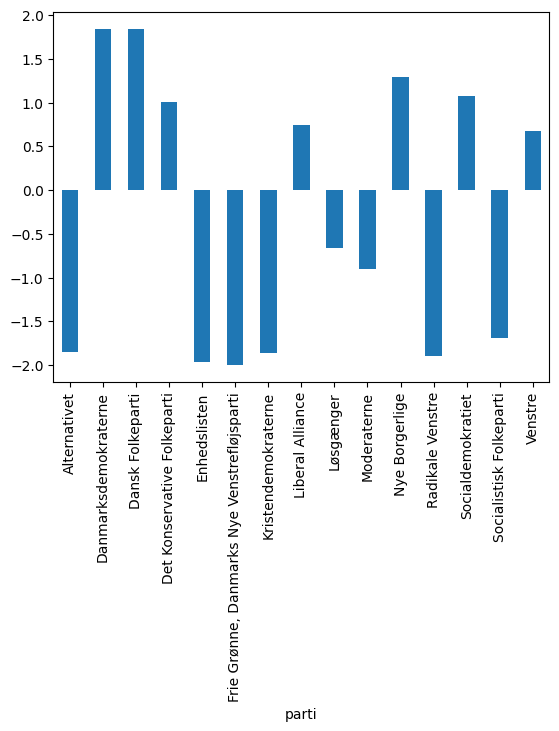

In [14]:
#plot the mean of the 555 column
allcandidate_df_without_name.groupby('parti').mean()['555'].plot(kind='bar')

<Axes: xlabel='parti'>

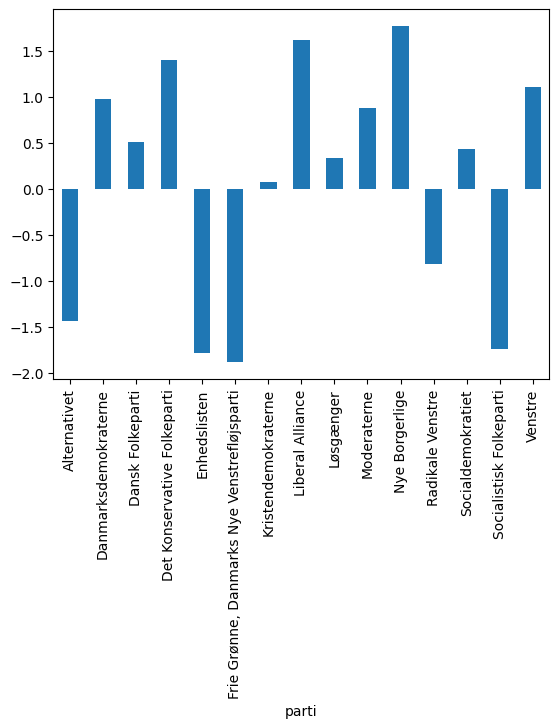

In [15]:
#plot the mean of the 543 column
allcandidate_df_without_name.groupby('parti').mean()['543'].plot(kind='bar')

<Axes: xlabel='parti'>

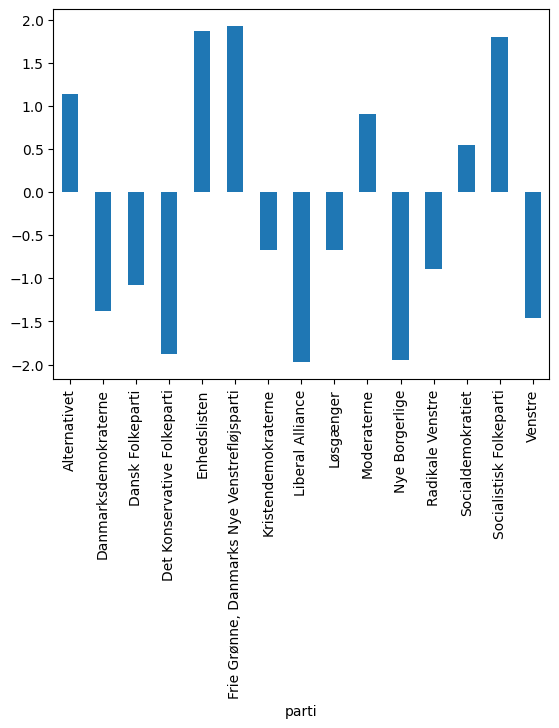

In [16]:
#plot the mean of the 531 column
allcandidate_df_without_name.groupby('parti').mean()['531'].plot(kind='bar')

<Axes: xlabel='parti'>

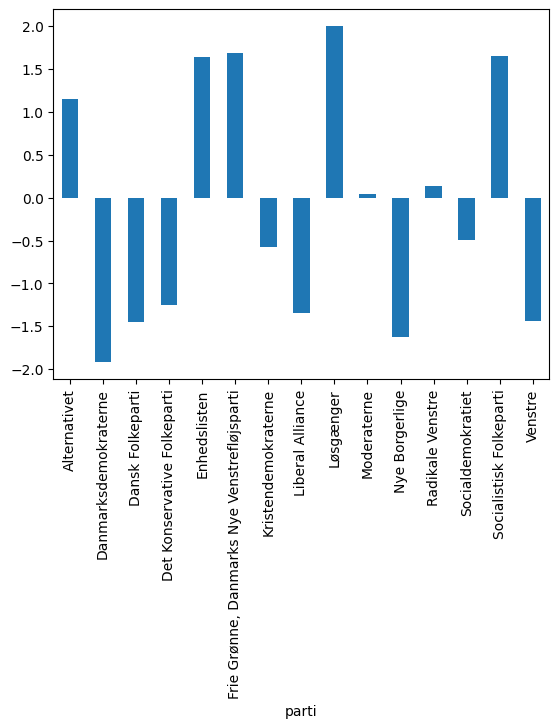

In [17]:
#plot the mean of the 541 column
allcandidate_df_without_name.groupby('parti').mean()['541'].plot(kind='bar')

# Grouping by party and counting the number of occurences of -2 or 2 in all columns

In [18]:
allcandidate_df_without_name.groupby('parti').agg(lambda x: (x == -2).sum() + (x == 2).sum())

,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b,alder,parti_id
parti,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alternativet,62,28,60,57,19,45,27,17,31,40,39,18,25,19,31,23,60,27,15,62,23,40,64,48,51,44,57,38,39,25,40,53,20,27,7,51,60,31,25,30,26,41,10,12,29,15,21,14,24,0,67
Danmarksdemokraterne,3,15,26,6,29,0,33,7,35,7,30,0,18,32,13,31,29,4,11,31,34,1,19,9,4,29,27,1,14,13,32,0,7,13,2,31,33,19,30,5,2,0,0,5,34,36,33,2,1,0,0
Dansk Folkeparti,3,14,35,34,31,6,29,12,26,12,39,34,19,25,11,35,46,21,16,41,35,18,19,19,20,28,13,19,19,33,44,10,27,26,20,46,39,17,26,17,8,15,12,9,28,36,40,11,17,0,0
Det Konservative Folkeparti,28,86,49,78,80,52,96,67,53,55,74,36,29,45,48,75,26,42,28,44,75,10,13,34,37,58,16,13,22,69,47,32,23,49,41,48,38,18,23,33,8,16,15,58,69,80,81,17,24,0,0
Enhedslisten,72,65,68,20,53,66,21,60,49,60,49,52,54,58,64,38,61,39,8,72,65,69,65,46,59,31,60,63,23,57,60,74,39,67,9,70,73,54,16,21,16,62,7,28,68,18,31,15,15,0,0
"Frie Grønne, Danmarks Nye Venstrefløjsparti",24,24,26,18,20,26,22,16,23,23,20,7,21,23,21,25,26,18,19,26,22,25,26,21,23,21,23,25,15,20,21,26,11,19,10,26,26,23,12,17,5,24,10,14,19,13,17,3,8,0,0
Kristendemokraterne,13,16,26,33,18,12,20,19,14,8,35,10,38,19,10,30,33,27,12,38,26,17,15,10,23,15,6,23,24,15,26,11,8,13,6,31,36,29,13,28,13,15,11,6,27,15,19,14,19,0,0
Liberal Alliance,20,68,24,27,51,63,70,68,37,45,25,30,68,42,17,65,29,24,30,13,65,10,15,13,22,36,12,27,53,62,43,48,35,12,7,5,9,59,28,9,7,40,14,50,65,67,61,45,61,0,0
Løsgænger,1,1,2,2,3,1,2,1,3,2,2,1,3,2,1,1,3,2,2,3,0,0,3,0,2,3,3,1,1,2,2,3,2,2,2,1,3,2,1,1,1,1,0,1,1,3,2,2,3,0,0


# Elected Members of the Folketing sorted by strongest left or right responses 
- it seems that the top of the list is populated mostly by MPs, that are either part of:
-  the Danish People's Party (nationalist ultra right wing populist party)
-  the Red-Green Alliance (the furtherst left wing party in Denmark)
-  Nye Borgerlige (also a far-left leaning party)
-  or by members of Socialist or Conservative small parties, with either strong right or left wing tendencies
-  Venstre or the Social Democrats (the two biggest parties in Denmark) seem to not have that many members with strict categorical views
I think that these results are naturally expected, especially for Danske Folkeparti and Enhedslisten

In [19]:
#number of "strong" responses per candidate
candidates_frame = alldata_df.groupby('navn').agg(lambda x: (x == -2).sum() + (x == 2).sum()).sum(axis=1).to_frame('sum')
candidates_frame_with_party = candidates_frame.join(alldata_df.set_index('navn')['parti'])
candidates_frame_with_party.sort_values(by=['sum'], ascending=False).head(10)

,sum,parti
navn,,
Sarah Nørris,49,Enhedslisten
Søren Vanting,49,Det Konservative Folkeparti
Kim Andkjær Doberck,44,Nye Borgerlige
Rashid Ali,43,"Frie Grønne, Danmarks Nye Venstrefløjsparti"
Mohamed Abdikarim,43,"Frie Grønne, Danmarks Nye Venstrefløjsparti"
John Bjerg,42,Nye Borgerlige
Jan Filbært,42,Enhedslisten
Qasam Nazir Ahmad,42,Alternativet
Elise Bjerkrheim,42,"Frie Grønne, Danmarks Nye Venstrefløjsparti"


# Boxplotting the most crucial questions by party to display the distribution of answers inter party and intra party in one visualization

<Axes: title={'center': '555'}, xlabel='parti'>

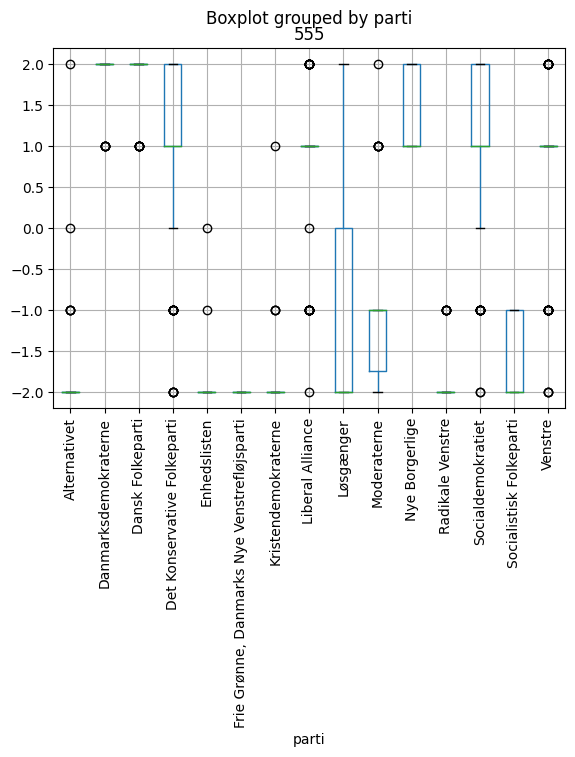

In [20]:
#boxplot of the 555 column grouped by parti
allcandidate_df_without_name.boxplot(column=['555'], by='parti', rot=90)

# Principal component analysis determines that 2 components can explain 56 % of the variance

In [21]:
#do PCA on the alldata_df and select the first 2 components
from sklearn import decomposition
pca = decomposition.PCA(n_components=None)
pca.fit(all_data_only_q)

#print first 5 explained variance ratios as float
for i in range(5):
    print(pca.explained_variance_ratio_[i])


0.42105587092263425
0.1400691462127485
0.09131070014131025
0.03644310460711798
0.026362210057535456


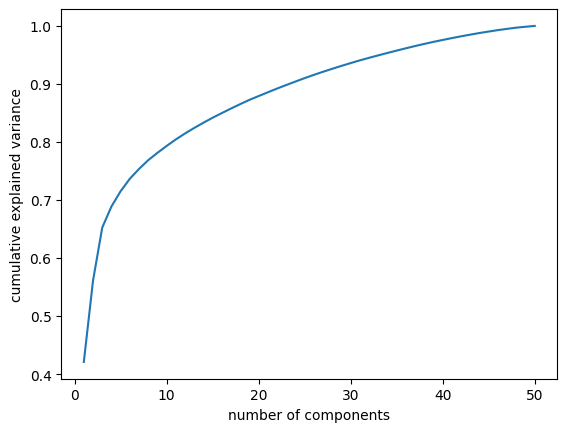

In [22]:
#plot a curve showing PCAs explained variance ratios
from matplotlib import pyplot as plt
import numpy as np

x = list(range(1, 1 + len(pca.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Assigning each party id to a color

In [23]:
#assign a numeric id to each party
alldata_df['parti_id'] = pd.factorize(alldata_df['parti'])[0]

colors_palette = ['purple', 'pink', 'darkgreen', 'black', 'orange', 'springgreen', 'darkblue', 'seagreen', 'yellow', 'dimgray', 'teal', 'turquoise', 'forestgreen', 'rebeccapurple', 'red']

#assign a color to each party based on the parti_id
alldata_df['color'] = alldata_df['parti_id'].apply(lambda x: colors_palette[x])

alldata_df['parti'].unique(), alldata_df['parti_id'].unique()

(array(['Moderaterne', 'Socialistisk Folkeparti', 'Alternativet',
        'Løsgænger', 'Enhedslisten', 'Danmarksdemokraterne', 'Venstre',
        'Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Dansk Folkeparti',
        'Kristendemokraterne', 'Liberal Alliance', 'Nye Borgerlige',
        'Det Konservative Folkeparti', 'Radikale Venstre',
        'Socialdemokratiet'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64))

# Using PCA to plot the data points by party

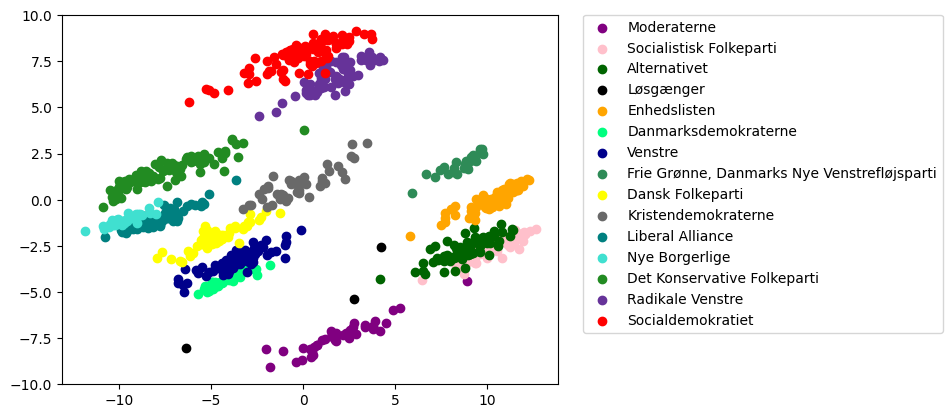

In [24]:
#plot the first 2 components of the PCA
pca2 = decomposition.PCA(n_components=2)
res2 = pca2.fit_transform(all_data_only_q)

#plot the first 2 components of the PCA with parti as color, add a legend with the parti names
for parti_id in alldata_df['parti_id'].unique():
    plt.scatter(res2[alldata_df['parti_id'] == parti_id, 0], res2[alldata_df['parti_id'] == parti_id, 1], c=colors_palette[parti_id])
#place a legend to the right of this smaller subplot
plt.legend(alldata_df['parti'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

<Axes: title={'center': 'PC1'}, xlabel='parti'>

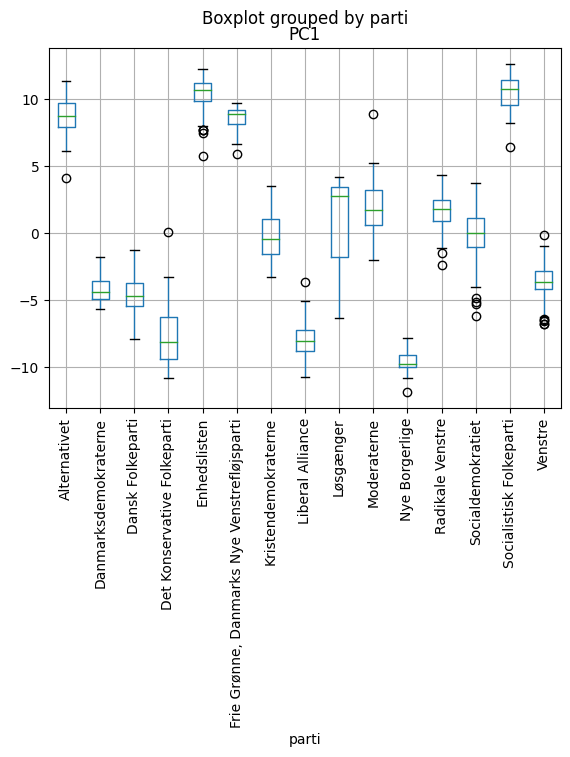

In [25]:
res2_df = pd.DataFrame(res2, columns=['PC1', 'PC2'])
#add parti_id to res2_df
# res2_df['parti_id'] = alldata_df['parti_id']
#add parti to res2_df
res2_df['parti'] = alldata_df['parti']

#boxplot of the first 2 components of the PCA grouped by parti_id
res2_df.boxplot(column=['PC1'], by='parti', rot=90)

<Axes: title={'center': 'PC2'}, xlabel='parti'>

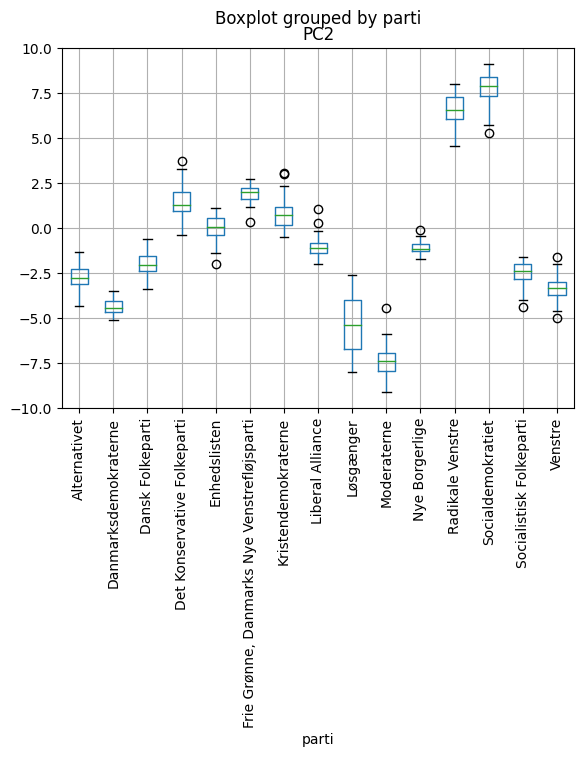

In [26]:
res2_df.boxplot(column=['PC2'], by='parti', rot=90)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Train-test split

In [28]:
# train-test split
y = all_data_only_q['parti_id']
data = all_data_only_q.drop(['parti_id'], axis='columns')
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=6, test_size=.2)

# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=6, max_depth=10)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.9812409812409812, 0.6609195402298851)

# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=6, max_depth=10, n_estimators=30)
forest_clf.fit(X_train, y_train)

forest_clf.score(X_train, y_train), forest_clf.score(X_test, y_test)

(0.9985569985569985, 0.8160919540229885)

# Random Forest classifier with optimal parameters using Cross Validation

In [31]:
from sklearn.model_selection import GridSearchCV
depths = range(1, 11)
sizes = range(2, 21)
features = range(1, 9)
params = {'min_samples_split': sizes, 
          'max_depth': depths, 
          'max_features': features}

gsc = GridSearchCV(RandomForestClassifier(random_state=6), params, n_jobs=16)
gsc.fit(X_train, y_train)
gsc.best_estimator_.fit(X_train, y_train)
gsc.score(X_test, y_test)

c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.8505747126436781


# Decision Tree classifier with optimal parameters using Cross Validation

In [32]:
from sklearn.model_selection import GridSearchCV
depths = range(1, 11)
sizes = range(2, 21)
features = range(1, 9)
params = {'min_samples_split': sizes, 
          'max_depth': depths, 
          'max_features': features}

gsc = GridSearchCV(DecisionTreeClassifier(random_state=6), params, n_jobs=16)
gsc.fit(X_train, y_train)
gsc.best_estimator_.fit(X_train, y_train)
gsc.score(X_test, y_test)

c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.6494252873563219

# Gradient Boosted Decision Trees

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
g_boost = GradientBoostingRegressor(n_estimators=30, max_depth=3, learning_rate=0.5)
g_boost.fit(X_train, y_train)
g_boost.score(X_test, y_test)

0.6237134232881769

# K-means Clustering

c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


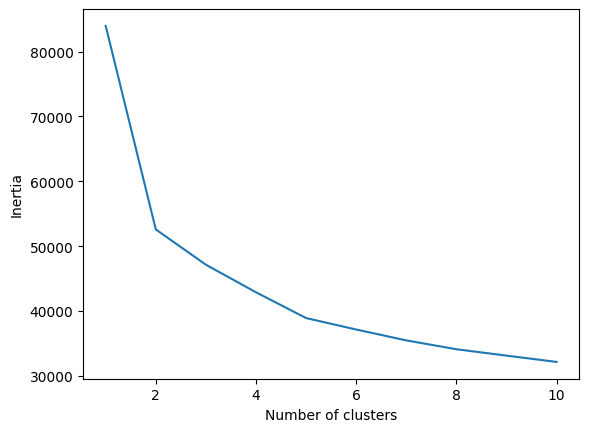

In [34]:
#kmeans with random initialization (all questions)
from sklearn.cluster import KMeans

#find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=100, init='random')
    kmeans.fit(all_data_only_q.drop(columns=['parti_id']))
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

0 ['Moderaterne'] [0 4] cluster
4    36
0     6
Name: count, dtype: int64
1 ['Socialistisk Folkeparti'] [3 4] cluster
3    69
4     1
Name: count, dtype: int64
2 ['Alternativet'] [3 4] cluster
3    56
4    11
Name: count, dtype: int64
3 ['Løsgænger'] [4 2] cluster
4    2
2    1
Name: count, dtype: int64
4 ['Enhedslisten'] [3] cluster
3    74
Name: count, dtype: int64
5 ['Danmarksdemokraterne'] [2] cluster
2    37
Name: count, dtype: int64
6 ['Venstre'] [0 4 2] cluster
0    75
2     6
4     3
Name: count, dtype: int64
7 ['Frie Grønne, Danmarks Nye Venstrefløjsparti'] [3] cluster
3    26
Name: count, dtype: int64
8 ['Dansk Folkeparti'] [2 0] cluster
2    48
0     1
Name: count, dtype: int64
9 ['Kristendemokraterne'] [4 1] cluster
4    41
1     1
Name: count, dtype: int64
10 ['Liberal Alliance'] [0] cluster
0    70
Name: count, dtype: int64
11 ['Nye Borgerlige'] [2 0] cluster
2    49
0     2
Name: count, dtype: int64
12 ['Det Konservative Folkeparti'] [0 4 2] cluster
0    95
4     2
2    

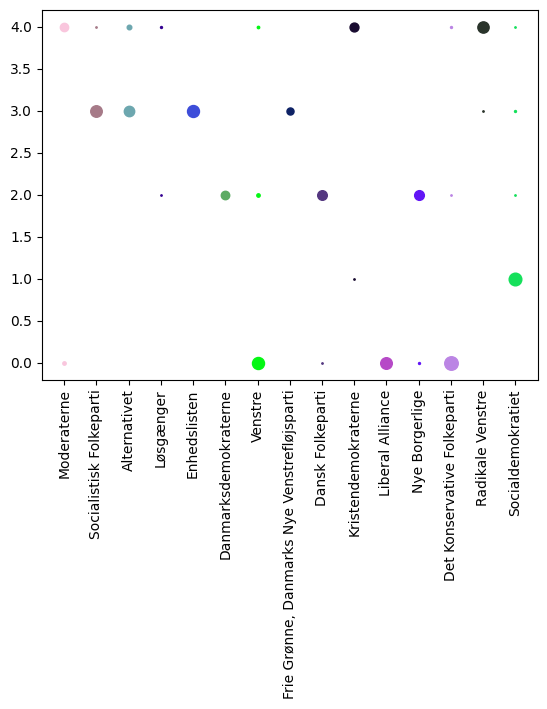

In [206]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=100, init='k-means++')
all_data_only_q['cluster'] = kmeans.fit_predict(all_data_only_q.drop(columns=['parti_id']))

#define colors for each parti
import random
colors_palette = []
for parti_id in alldata_df['parti_id'].unique():
    colors_palette.append('#%06X' % random.randint(0, 0xFFFFFF))

#plot a chart of candidates grouped by parti and cluster with the cluster as color, make the dot size proportional to the number of candidates in the cluster
for parti_id in alldata_df['parti_id'].unique():
    print(parti_id, alldata_df[alldata_df['parti_id'] == parti_id]['parti'].unique(), all_data_only_q[all_data_only_q['parti_id'] == parti_id]['cluster'].unique(), all_data_only_q[all_data_only_q['parti_id'] == parti_id]['cluster'].value_counts())
    #get parti name from parti_id
    parti = alldata_df[alldata_df['parti_id'] == parti_id]['parti'].unique()[0]
    color = colors_palette[parti_id]
    for cluster_id in all_data_only_q[all_data_only_q['parti_id'] == parti_id]['cluster'].unique():
        plt.scatter(parti, cluster_id, s=all_data_only_q[all_data_only_q['parti_id'] == parti_id]['cluster'].value_counts()[cluster_id], c=color)
plt.xticks(rotation=90)
plt.show()

#plot a bar chart of candidates grouped by parti showing the percentage of candidates in each cluster
#ToDo:

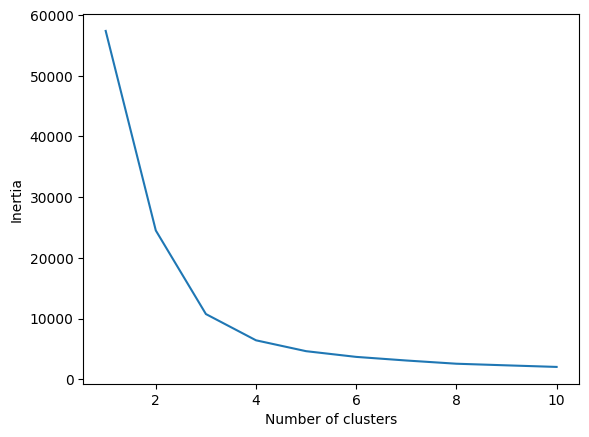

,PC1,PC2,parti,cluster
0,-2.002833,-8.070786,Moderaterne,0
1,11.125840,-2.105229,Socialistisk Folkeparti,1
2,9.334246,-2.011785,Alternativet,1
3,7.183743,-2.528861,Alternativet,1
4,2.736158,-5.403217,Løsgænger,1


In [42]:
#kmeans with random initialization (only PCA1 and PCA2)
from sklearn.cluster import KMeans

#find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=100, init='random')
    kmeans.fit(res2_df.drop(columns=['parti']))
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

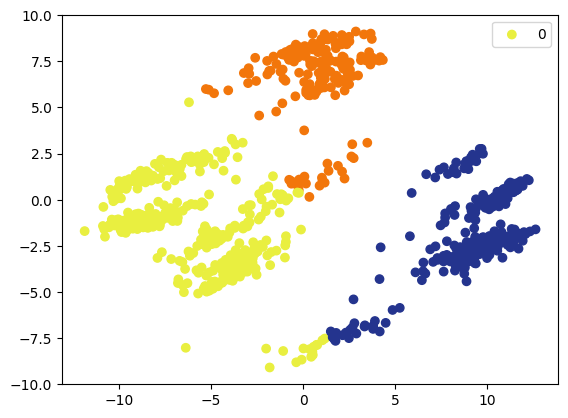

In [186]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=12, init='k-means++')
res2_df['cluster'] = kmeans.fit_predict(res2_df.drop(columns=['parti']))

#generate num_clusters random colors
import random
colors_palette = []
for i in range(num_clusters):
    colors_palette.append('#%06X' % random.randint(0, 0xFFFFFF))

#plot the clusters with parti as color and cluster as shape with legend
plt.scatter(res2_df['PC1'], res2_df['PC2'], c=res2_df['cluster'].apply(lambda x: colors_palette[x]))
plt.legend(res2_df['cluster'].unique())
plt.show()

### Based on the Elbow chart, the most efficient number of clusters for this dataset is 2 or 3, which is cluster reduction compared to origional 15 parties/clusters. 

# Hierachical Clustering

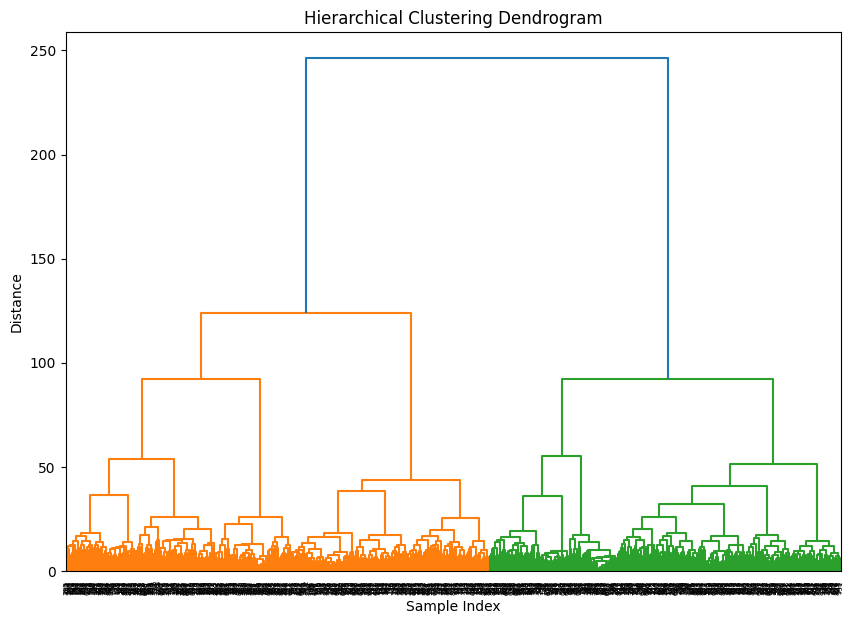

In [36]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assume 'data' is your preprocessed dataset

# Calculate the linkage matrix
linked = linkage(all_data_only_q.drop(columns=['parti_id']), 'ward')  # You can choose different linkage methods

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [140]:
res2_df.head()

,PC1,PC2,parti,cluster
0,-2.002833,-8.070786,Moderaterne,4
1,11.125840,-2.105229,Socialistisk Folkeparti,1
2,9.334246,-2.011785,Alternativet,1
3,7.183743,-2.528861,Alternativet,1
4,2.736158,-5.403217,Løsgænger,4


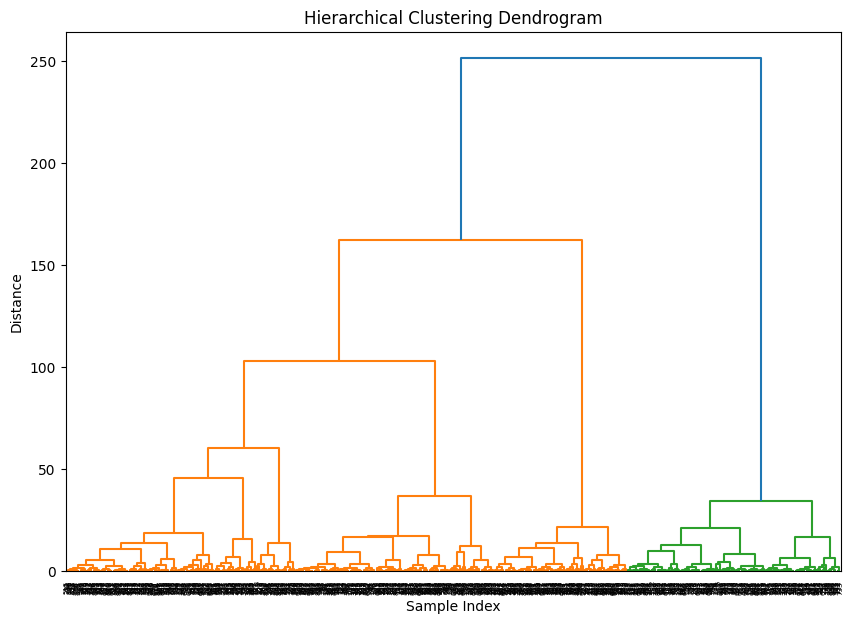

In [143]:
#hierarchical clustering with ward linkage (PCA1 and PCA2)
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assume 'data' is your preprocessed dataset

# Calculate the linkage matrix
linked = linkage(res2_df.drop(columns=['parti', 'cluster']), 'ward')  # You can choose different linkage methods

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# DBScan Clustering

c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

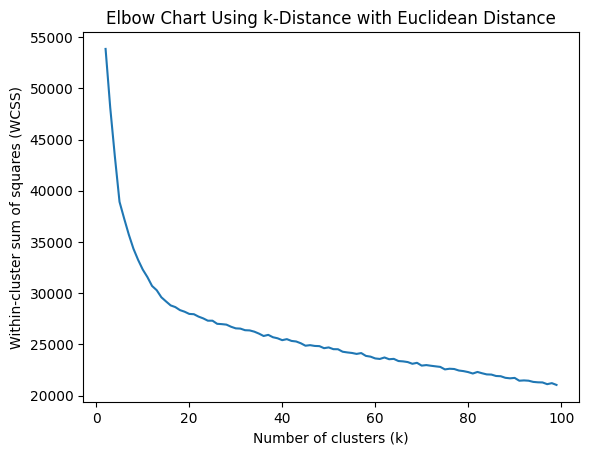

In [172]:
#DBSCAN
from sklearn.cluster import DBSCAN

# minPts = 10
minPts = 2*(all_data_only_q.shape[1] -1)

#plot the elbow chart for the eps parameter
k_range = range(2, minPts)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    # kmeans.fit(res2_df.drop(columns=['parti', 'cluster']))
    kmeans.fit(all_data_only_q.drop(columns=['parti_id']))
    wcss.append(kmeans.inertia_)
plt.plot(k_range, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Chart Using k-Distance with Euclidean Distance')
plt.show()

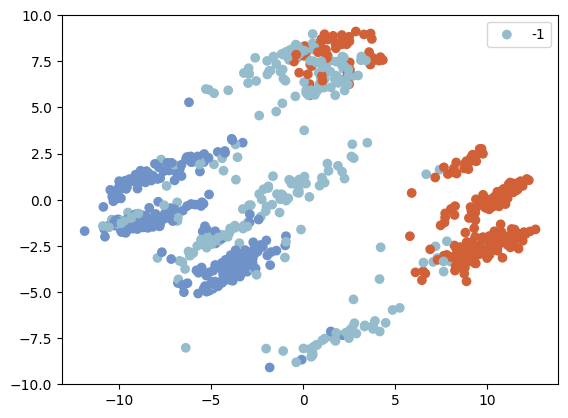

In [185]:
#train the DBSCAN model
dbscan = DBSCAN(eps=8, min_samples=minPts)
# dbscan.fit(res2_df.drop(columns=['parti', 'cluster']))
dbscan.fit(all_data_only_q.drop(columns=['parti_id']))
res2_df['cluster'] = dbscan.labels_

#plot a chart with cluster as color and parti as shape
plt.scatter(res2_df['PC1'], res2_df['PC2'], c=res2_df['cluster'].apply(lambda x: colors_palette[x]))
plt.legend(res2_df['cluster'].unique())
plt.show()

# Determining which candidates disagree the most within each party

In [38]:
import pandas as pd
from itertools import combinations
from scipy.spatial import distance


# Define the features and remove the party column
data_questions = elected_candidate_df.drop(columns=['navn','parti','storkreds', 'alder'])

# Find candidates who disagree the most within each party
disagreements = []
for party in elected_candidate_df['parti'].unique():
    party_data = elected_candidate_df[elected_candidate_df['parti'] == party][data_questions.columns]
    pairs = list(combinations(party_data.index, 2))
    max_disagreement = max([distance.euclidean(party_data.loc[i[0]], party_data.loc[i[1]]) for i in pairs])
    max_disagreement_pair = pairs[[distance.euclidean(party_data.loc[i[0]], party_data.loc[i[1]]) for i in pairs].index(max_disagreement)]
    disagreements.append((party, max_disagreement_pair, max_disagreement))

# Display the candidates who disagree the most within each party
for disagreement in disagreements:
    candidate1_name = elected_candidate_df.loc[disagreement[1][0], 'navn']
    candidate2_name = elected_candidate_df.loc[disagreement[1][1], 'navn']
    print(f"Party: {disagreement[0]}, Candidates: {candidate1_name} and {candidate2_name}")


Party: Socialistisk Folkeparti, Candidates: Sofie Lippert and Pia Olsen Dyhr
Party: Alternativet, Candidates: Torsten Gejl and Sascha Faxe
Party: Enhedslisten, Candidates: Jette Gottlieb and Victoria Velásquez
Party: Danmarksdemokraterne, Candidates: Søren Espersen and Charlotte Munch
Party: Venstre, Candidates: Michael Aastrup Jensen and Jan E. Jørgensen
Party: Dansk Folkeparti, Candidates: Nick Zimmermann and Alex Ahrendtsen
Party: Moderaterne, Candidates: Jon Læssøe Stephensen and Kristian Klarskov
Party: Liberal Alliance, Candidates: Lars-Christian Brask and Steffen Frølund
Party: Nye Borgerlige, Candidates: Lars Boje Mathiesen and Mikkel Bjørn
Party: Det Konservative Folkeparti, Candidates: Helle Bonnesen and Mai Mercado
Party: Radikale Venstre, Candidates: Christian Friis Bach and Sofie Carsten Nielsen
Party: Socialdemokratiet, Candidates: Mette Reissmann and Bjørn Brandenborg


# Determining which parties disagree the most

In [39]:
party_combinations = list(combinations(elected_candidate_df['parti'].unique(), 2))
overall_disagreements = []
for combination in party_combinations:
    party1_data = elected_candidate_df[elected_candidate_df['parti'] == combination[0]][data_questions.columns]
    party2_data = elected_candidate_df[elected_candidate_df['parti'] == combination[1]][data_questions.columns]
    pairs = [(i, j) for i in party1_data.index for j in party2_data.index]
    avg_disagreement = sum([distance.euclidean(party1_data.loc[i[0]], party2_data.loc[i[1]]) for i in pairs]) / len(pairs)
    overall_disagreements.append((combination, avg_disagreement))

# Sort party combinations based on the average disagreement
overall_disagreements.sort(key=lambda x: x[1], reverse=True)

# Display party combinations that disagree the most overall
for overall_disagreement in overall_disagreements:
    print(f"Parties: {overall_disagreement[0]}, Average Disagreement: {overall_disagreement[1]}")

Parties: ('Enhedslisten', 'Nye Borgerlige'), Average Disagreement: 20.310365525125412
Parties: ('Enhedslisten', 'Liberal Alliance'), Average Disagreement: 20.29917563960982
Parties: ('Alternativet', 'Nye Borgerlige'), Average Disagreement: 19.50074028773742
Parties: ('Socialistisk Folkeparti', 'Liberal Alliance'), Average Disagreement: 19.43946504383143
Parties: ('Socialistisk Folkeparti', 'Nye Borgerlige'), Average Disagreement: 19.430304426099752
Parties: ('Enhedslisten', 'Det Konservative Folkeparti'), Average Disagreement: 19.340725237494592
Parties: ('Alternativet', 'Liberal Alliance'), Average Disagreement: 18.319683158833513
Parties: ('Socialistisk Folkeparti', 'Det Konservative Folkeparti'), Average Disagreement: 18.178507128889365
Parties: ('Nye Borgerlige', 'Radikale Venstre'), Average Disagreement: 17.842260555083413
Parties: ('Enhedslisten', 'Danmarksdemokraterne'), Average Disagreement: 17.745703249523
Parties: ('Alternativet', 'Dansk Folkeparti'), Average Disagreement: 17